#### Make the reaction step editing more automatic

In [1]:
import numpy as np

import pandas as pd
import amat_utils

from rdkit import Chem
from rdkit.Chem import AllChem, rdDistGeom
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw, Atom
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.ipython_3d = True

An example from AZF paper
target mol: CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(NC3=CC=C(C4=NOC=N4)C=C3)=O)C(C)=CC=C1

In [ ]:
rxn_1 = AllChem.ReactionFromSmarts("CC1=C(NCC(OCC)=O)C(C)=CC=C1.O=C(Cl)C1CCS(CC1)(=O)=O>>CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(OCC)=O)C(C)=CC=C1")
rxn_1
# rxn_2 = "CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(OCC)=O)C(C)=CC=C1.NC1=CC=C(C2=NOC=N2)C=C1>>CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(NC3=CC=C(C4=NOC=N4)C=C3)=O)C(C)=CC=C1"

In [2]:
r1 = Chem.MolFromSmiles("CC1=C(NCC(OCC)=O)C(C)=CC=C1")
r2 = Chem.MolFromSmiles("O=C(Cl)C1CCS(CC1)(=O)=O")
r3 = Chem.MolFromSmiles("CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(OCC)=O)C(C)=CC=C1")
r4 = Chem.MolFromSmiles("NC1=CC=C(C2=NOC=N2)C=C1")
p_target = Chem.MolFromSmiles("CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(NC3=CC=C(C4=NOC=N4)C=C3)=O)C(C)=CC=C1")

# Convert to smarts for reaction definition - not useful
# r1_smarts = Chem.MolToSmarts(r1)
# r2_smarts = Chem.MolToSmarts(r2)
# r3_smarts = Chem.MolToSmarts(r3)
# r4_smarts = Chem.MolToSmarts(r4)
# p_target_smarts = Chem.MolToSmarts(p_target)

In [ ]:
# reading the smiles string rxn won't work, it cannot highlight the changing atoms/bonds

# rxn_1 = AllChem.ReactionFromSmarts(f"{r1_smarts}.{r2_smarts}>>{r3_smarts}")
# rxn_2 = AllChem.ReactionFromSmarts(f"{r3_smarts}.{r4_smarts}>>{p_target_smarts}")
# print(type(rxn_1))
# IPythonConsole.molSize = (600,250)
# IPythonConsole.highlightByReactant = True


### Try MCS (3D maximum common substructure)

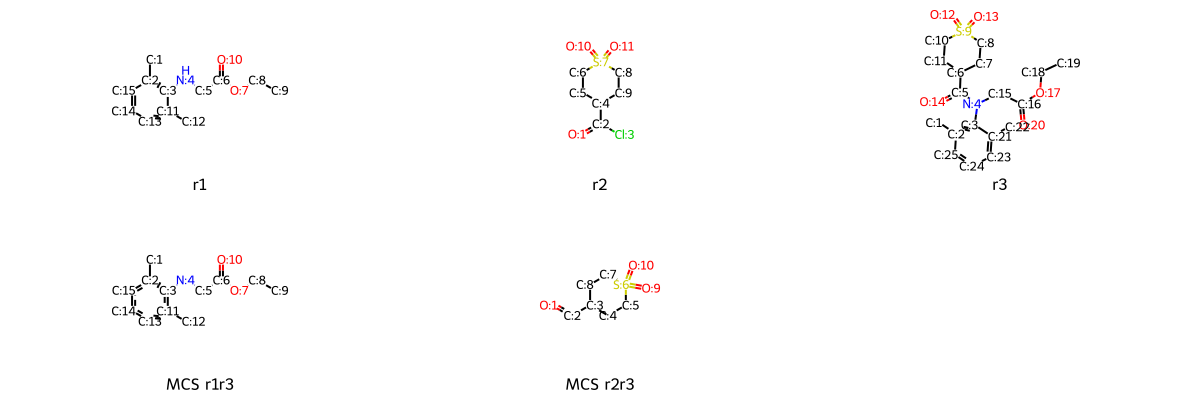

In [ ]:



# set True in completeRingsOnly and ringMatchesRingOnly not really useful here.
mcs_true = rdFMCS.FindMCS([r1, r3], completeRingsOnly=True, ringMatchesRingOnly=True, timeout=10) 

MCS_r1r3 = rdFMCS.FindMCS([r1, r3])
MCS_r2r3 = rdFMCS.FindMCS([r2, r3])

mol_MCS_r1r3 = Chem.MolFromSmarts(MCS_r1r3.smartsString)
mol_MCS_r2r3 = Chem.MolFromSmarts(MCS_r2r3.smartsString)

legends = ['r1', 'r2', 'r3', 'MCS r1r3', 'MCS r2r3']
mol_index = [amat_utils.mol_with_atom_index(mol) for mol in [r1, r2, r3, mol_MCS_r1r3, mol_MCS_r2r3]]
Draw.MolsToGridImage(mol_index, molsPerRow=3, subImgSize=(400,200), legends=legends)
# Draw.MolToImage(r1, includeAtomNumbers=True)

# # The below two SMILES text are identical in ChemDraw illustration!
# print("r1", Chem.MolToSmiles(r1))
# print("MCS r1r3:", Chem.MolToSmiles(mol_MCS_r1r3))


In [29]:
amat_r1 = Chem.GetAdjacencyMatrix(r1,useBO=True,force=True)
amat_MCS_r1r3 = Chem.GetAdjacencyMatrix(mol_MCS_r1r3,useBO=True,force=True)
amat_r2 = Chem.GetAdjacencyMatrix(r2,useBO=True,force=True)
amat_MCS_r2r3 = Chem.GetAdjacencyMatrix(mol_MCS_r2r3,useBO=True,force=True)


print(amat_r1.shape)
print(amat_MCS_r1r3.shape)
print(amat_r2.shape)
print(amat_MCS_r2r3.shape)

(15, 15)
(15, 15)
(11, 11)
(10, 10)


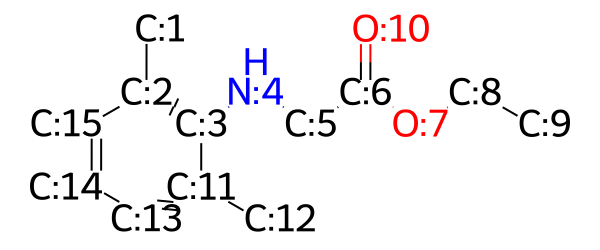

In [37]:
amat_utils.mol_with_atom_index(r1)

# print(r2.GetNumAtoms())
# print(amat_r2)

## Test: Highlighting changing atoms and bonds in reactions
ref: https://greglandrum.github.io/rdkit-blog/posts/2021-11-26-highlighting-changed-bonds-in-reactions.html


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdChemReactions
import rdkit
print(rdkit.__version__)

In [ ]:
rxn1 = rdChemReactions.ReactionFromRxnBlock('''$RXN

      Mrv2102  111820212128

  2  1
$MOL

  Mrv2102 11182121282D          

 13 13  0  0  0  0            999 V2000
   -7.5723    2.6505    0.0000 C   0  0  0  0  0  0  0  0  0  1  0  0
   -6.8579    2.2380    0.0000 O   0  0  0  0  0  0  0  0  0  2  0  0
   -6.8580    1.4130    0.0000 C   0  0  0  0  0  0  0  0  0  3  0  0
   -6.1435    1.0004    0.0000 O   0  0  0  0  0  0  0  0  0  4  0  0
   -7.5725    1.0005    0.0000 C   0  0  0  0  0  0  0  0  0  5  0  0
   -7.5725    0.1755    0.0000 N   0  0  0  0  0  0  0  0  0  6  0  0
   -8.2869   -0.2369    0.0000 C   0  0  0  0  0  0  0  0  0  7  0  0
   -8.2870   -1.0620    0.0000 C   0  0  0  0  0  0  0  0  0  8  0  0
   -9.0015   -1.4745    0.0000 C   0  0  0  0  0  0  0  0  0  9  0  0
   -9.0015   -2.2995    0.0000 C   0  0  0  0  0  0  0  0  0 10  0  0
   -8.2870   -2.7120    0.0000 C   0  0  0  0  0  0  0  0  0 11  0  0
   -7.5726   -2.2995    0.0000 C   0  0  0  0  0  0  0  0  0 12  0  0
   -7.5726   -1.4745    0.0000 C   0  0  0  0  0  0  0  0  0 13  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  2  0  0  0  0
  3  5  1  0  0  0  0
  5  6  1  0  0  0  0
  6  7  2  0  0  0  0
  7  8  1  0  0  0  0
  8  9  1  0  0  0  0
  8 13  2  0  0  0  0
  9 10  2  0  0  0  0
 10 11  1  0  0  0  0
 11 12  2  0  0  0  0
 12 13  1  0  0  0  0
M  END
$MOL

  Mrv2102 11182121282D          

 12 11  0  0  0  0            999 V2000
   -3.7934    0.7703    0.0000 C   0  0  0  0  0  0  0  0  0 14  0  0
   -3.0790    1.1828    0.0000 C   0  0  0  0  0  0  0  0  0 15  0  0
   -2.3645    0.7703    0.0000 C   0  0  0  0  0  0  0  0  0 16  0  0
   -3.7934   -0.0547    0.0000 C   0  0  0  0  0  0  0  0  0 17  0  0
   -4.5078   -0.4672    0.0000 O   0  0  0  0  0  0  0  0  0 18  0  0
   -3.0789   -0.4671    0.0000 O   0  0  0  0  0  0  0  0  0 19  0  0
   -1.6500    1.1828    0.0000 O   0  0  0  0  0  0  0  0  0 20  0  0
   -2.3645   -0.0547    0.0000 O   0  0  0  0  0  0  0  0  0 21  0  0
   -3.0788   -1.2922    0.0000 C   0  0  0  0  0  0  0  0  0 22  0  0
   -1.6500   -0.4672    0.0000 C   0  0  0  0  0  0  0  0  0 23  0  0
   -2.3644   -1.7046    0.0000 C   0  0  0  0  0  0  0  0  0 24  0  0
   -1.6500   -1.2922    0.0000 C   0  0  0  0  0  0  0  0  0 25  0  0
  1  2  2  0  0  0  0
  1  4  1  0  0  0  0
  2  3  1  0  0  0  0
  3  7  2  0  0  0  0
  3  8  1  0  0  0  0
  4  5  2  0  0  0  0
  4  6  1  0  0  0  0
  6  9  1  0  0  0  0
  8 10  1  0  0  0  0
  9 11  1  0  0  0  0
 10 12  1  0  0  0  0
M  END
$MOL

  Mrv2102 11182121282D          

 25 26  0  0  0  0            999 V2000
    5.1328    0.9532    0.0000 C   0  0  0  0  0  0  0  0  0  5  0  0
    5.8002    0.4683    0.0000 N   0  0  0  0  0  0  0  0  0  6  0  0
    5.5453   -0.3163    0.0000 C   0  0  0  0  0  0  0  0  0  7  0  0
    4.7203   -0.3163    0.0000 C   0  0  0  0  0  0  0  0  0 14  0  0
    4.4654    0.4683    0.0000 C   0  0  0  0  0  0  0  0  0 15  0  0
    5.1328    1.7782    0.0000 C   0  0  0  0  0  0  0  0  0  3  0  0
    3.6807    0.7232    0.0000 C   0  0  0  0  0  0  0  0  0 16  0  0
    4.2354   -0.9838    0.0000 C   0  0  0  0  0  0  0  0  0 17  0  0
    6.0302   -0.9838    0.0000 C   0  0  0  0  0  0  0  0  0  8  0  0
    6.8507   -0.8975    0.0000 C   0  0  0  0  0  0  0  0  0  9  0  0
    7.3356   -1.5650    0.0000 C   0  0  0  0  0  0  0  0  0 10  0  0
    7.0001   -2.3187    0.0000 C   0  0  0  0  0  0  0  0  0 11  0  0
    6.1796   -2.4049    0.0000 C   0  0  0  0  0  0  0  0  0 12  0  0
    5.6947   -1.7375    0.0000 C   0  0  0  0  0  0  0  0  0 13  0  0
    3.4149   -0.8975    0.0000 O   0  0  0  0  0  0  0  0  0 18  0  0
    4.5709   -1.7375    0.0000 O   0  0  0  0  0  0  0  0  0 19  0  0
    4.0860   -2.4049    0.0000 C   0  0  0  0  0  0  0  0  0 22  0  0
    3.2655   -2.3187    0.0000 C   0  0  0  0  0  0  0  0  0 24  0  0
    3.5092    1.5302    0.0000 O   0  0  0  0  0  0  0  0  0 20  0  0
    3.0676    0.1712    0.0000 O   0  0  0  0  0  0  0  0  0 21  0  0
    2.2830    0.4261    0.0000 C   0  0  0  0  0  0  0  0  0 23  0  0
    1.6699   -0.1259    0.0000 C   0  0  0  0  0  0  0  0  0 25  0  0
    5.8473    2.1907    0.0000 O   0  0  0  0  0  0  0  0  0  4  0  0
    4.4183    2.1907    0.0000 O   0  0  0  0  0  0  0  0  0  2  0  0
    4.4183    3.0157    0.0000 C   0  0  0  0  0  0  0  0  0  1  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  1  5  1  0  0  0  0
  1  6  1  0  0  0  0
  5  7  1  0  0  0  0
  4  8  1  0  0  0  0
  3  9  1  0  0  0  0
 10 11  2  0  0  0  0
 11 12  1  0  0  0  0
 12 13  2  0  0  0  0
 13 14  1  0  0  0  0
  9 10  1  0  0  0  0
  9 14  2  0  0  0  0
  8 15  2  0  0  0  0
  8 16  1  0  0  0  0
 16 17  1  0  0  0  0
 17 18  1  0  0  0  0
  7 19  2  0  0  0  0
  7 20  1  0  0  0  0
 20 21  1  0  0  0  0
 21 22  1  0  0  0  0
  6 23  2  0  0  0  0
  6 24  1  0  0  0  0
 24 25  1  0  0  0  0
M  END
''')